In [1]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
train_datagen = ImageDataGenerator( #image augmentation for getting dummy data
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255) #rescale the image as 0 and 1s

In [3]:
train_generator = train_datagen.flow_from_directory(
        '../Desktop/gp_data/train',
        color_mode = "grayscale",
        target_size=(200, 200),  
        batch_size=128,
        class_mode='categorical',
        shuffle=True)
validation_generator = test_datagen.flow_from_directory(
        '../Desktop/gp_data/validation',
        color_mode = "grayscale",
        target_size=(200, 200),
        batch_size=64,
        class_mode='categorical',
        shuffle=False)
test_generator = test_datagen.flow_from_directory(
        '../Desktop/gp_data/test',
        color_mode = "grayscale",
        target_size=(200, 200),
        batch_size=1,
        shuffle=False)

Found 16000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


(240, 640, 3)


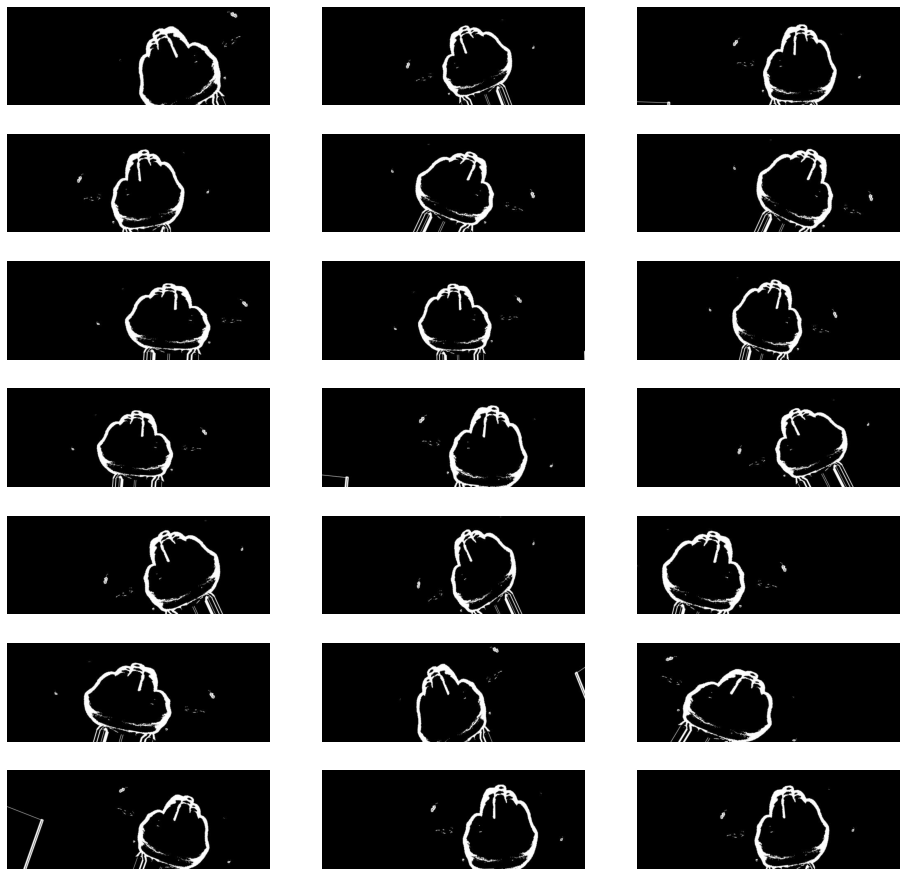

In [12]:
import matplotlib.pyplot as plt
import glob
import cv2
images = [cv2.imread(file) for file in glob.glob("../Desktop/augmented_imagess/*.jpeg")]

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
print(images[0].shape)
plt.figure(figsize=(16,16))
for i, img in enumerate(images):
    plt.subplot(7, 3, i+1)
    plt.axis("off")
    plt.imshow(img)

(128, 200, 200, 1) (128, 10)


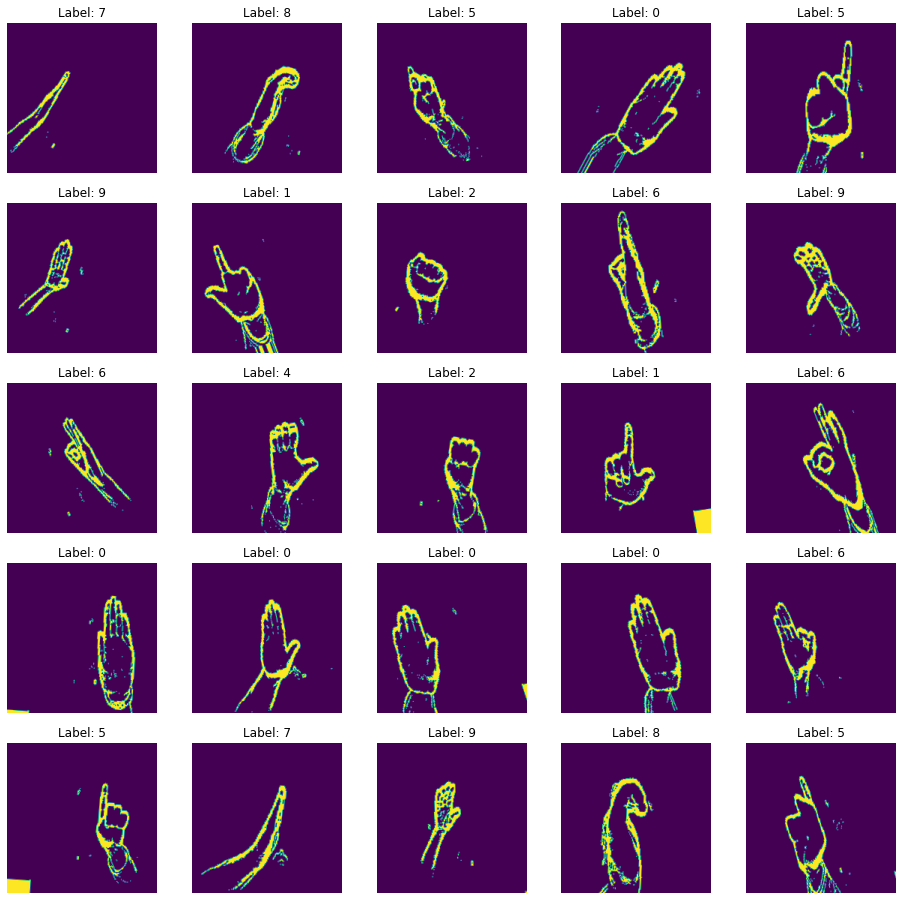

In [13]:
for X, y in train_generator:
    print(X.shape, y.shape)
    plt.figure(figsize=(16,16))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.axis('off')
        plt.title('Label: %d' %np.argmax(y[i]))
        img=np.uint8(255*X[i,:,:,0]) 
        plt.imshow(img)
    break 

In [14]:
from keras.preprocessing.image import ImageDataGenerator #to generate the image
from keras import models, layers
from keras.layers import Conv2D #used for convolution layer to create feature maps of 2D image
from keras.layers import MaxPooling2D #does maxpooling of 2D image
from keras.layers import Dropout #drop some neurons in hidden layers, so that the network can generalize enough as well as to avoid the dependence of neuron on a single neuron
from keras.layers import Dense #create fully connected network
from keras.layers import Flatten #unroll convolutional layer into a 1-column vector
from keras.callbacks import EarlyStopping, ModelCheckpoint #stop the training process when model reaches some accuracy point, to save model
from keras.models import Sequential, load_model
import tensorflow as tf #deep learning framework to train model
import numpy as np #For performing numerical computation
import os #To be able to read and write over files

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                        input_shape=(200, 200, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.50))
model.add(layers.Dense(10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 21, 256)      

In [17]:
from tensorflow.keras import optimizers
import keras
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [18]:
callbacks_list = [EarlyStopping(monitor='val_loss',patience=10),ModelCheckpoint("model-{epoch:02d}.h5",save_best_only=True)]

In [19]:
history = model.fit(
        train_generator,
        steps_per_epoch=64,
        epochs=200,
        validation_data=validation_generator,
        validation_steps=30,
        callbacks=callbacks_list)

Epoch 1/200
64/64 [==============================] - 421s 7s/step - loss: 1.6891 - accuracy: 0.4214 - val_loss: 1.5658 - val_accuracy: 0.8406
Epoch 2/200
64/64 [==============================] - 396s 6s/step - loss: 0.7469 - accuracy: 0.7531 - val_loss: 0.3833 - val_accuracy: 0.9375
Epoch 3/200
64/64 [==============================] - 382s 6s/step - loss: 0.4638 - accuracy: 0.8430 - val_loss: 0.1740 - val_accuracy: 0.9781
Epoch 4/200
64/64 [==============================] - 455s 7s/step - loss: 0.3022 - accuracy: 0.9031 - val_loss: 0.0194 - val_accuracy: 0.9899
Epoch 5/200
64/64 [==============================] - 430s 7s/step - loss: 0.2122 - accuracy: 0.9298 - val_loss: 0.0026 - val_accuracy: 0.9904
Epoch 6/200
64/64 [==============================] - 440s 7s/step - loss: 0.1828 - accuracy: 0.9407 - val_loss: 0.0016 - val_accuracy: 0.9931
Epoch 7/200
64/64 [==============================] - 480s 7s/step - loss: 0.1430 - accuracy: 0.9548 - val_loss: 0.0042 - val_accuracy: 0.9963
Epoch 

In [21]:
test_generator.reset()

In [22]:
model.evaluate(test_generator)

2000/2000 [==============================] - 46s 23ms/step


[5.960446742392378e-06, 0.9975000023841858]

In [23]:
prediction = model.predict_generator(test_generator,verbose=1,steps=1000/32)

32/31 [==============================] - 1s 22ms/step


In [24]:
print(prediction)

[[1.00000000e+00 1.04152174e-13 8.70935106e-13 1.00839408e-13
  7.64207016e-15 2.08142888e-16 9.93956436e-13 6.10214379e-10
  2.49077750e-13 1.12778927e-13]
 [1.00000000e+00 5.78449164e-11 1.41559395e-08 4.98347934e-12
  4.44888673e-13 3.27523633e-11 6.40033693e-10 1.54109170e-08
  6.65827419e-12 1.42822375e-12]
 [1.00000000e+00 5.13567144e-09 1.39078198e-08 2.96706041e-12
  3.53422916e-11 1.57579175e-11 5.46529599e-10 2.46284415e-09
  3.00305462e-12 2.10537508e-11]
 [1.00000000e+00 2.24624208e-09 8.62320304e-16 1.20255290e-18
  2.97872268e-13 5.63988414e-20 1.98248750e-16 9.88530132e-17
  4.19848884e-19 5.21101412e-14]
 [1.00000000e+00 1.63068092e-09 7.30788041e-10 6.84775045e-14
  2.58937038e-10 5.74315232e-16 5.41802634e-15 8.27604468e-15
  2.26215628e-15 1.27172561e-09]
 [1.00000000e+00 9.08203290e-09 3.32554206e-09 1.07685302e-12
  3.44507378e-09 7.55044492e-15 4.90847109e-13 9.17942649e-15
  5.62546192e-14 2.39514399e-08]
 [1.00000000e+00 2.67067186e-08 6.67828737e-10 6.97556840e

In [25]:
test_generator.reset()

In [28]:
model.evaluate_generator(generator=test_generator,
steps=20)

[1.1920922133867862e-06, 1.0]

In [29]:
test_generator.reset()

In [32]:
pred=model.predict_generator(test_generator,
steps=2000,
verbose=1)

2000/2000 [==============================] - 43s 21ms/step


In [33]:
predicted_class_indices=np.argmax(pred,axis=1)

In [34]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [35]:
print(pred)

[[1.00000000e+00 1.04152174e-13 8.70935106e-13 ... 6.10214379e-10
  2.49077750e-13 1.12778927e-13]
 [1.00000000e+00 5.78449164e-11 1.41559395e-08 ... 1.54109170e-08
  6.65827419e-12 1.42822375e-12]
 [1.00000000e+00 5.13567144e-09 1.39078198e-08 ... 2.46284415e-09
  3.00305462e-12 2.10537508e-11]
 ...
 [7.22749429e-14 7.87960062e-12 7.23466174e-19 ... 7.80626623e-17
  1.15629645e-14 1.00000000e+00]
 [9.42414685e-14 6.47044137e-12 1.43892152e-18 ... 5.56416102e-16
  1.10866186e-14 1.00000000e+00]
 [3.17041142e-12 6.59542554e-09 5.90148079e-19 ... 1.19648410e-12
  1.31742412e-15 9.99994040e-01]]


In [36]:
print(predicted_class_indices)

[0 0 0 ... 9 9 9]


In [37]:
print(predictions)

['01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm', '01_palm'

In [38]:
import pandas as pd
print(len(test_generator.filenames))
print(len(predictions))

2000
2000


In [39]:
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results.csv",index=False)

In [40]:
scoreSeg = model.evaluate_generator(test_generator, 5)
print("Accuracy = ",scoreSeg[1])

Accuracy =  1.0


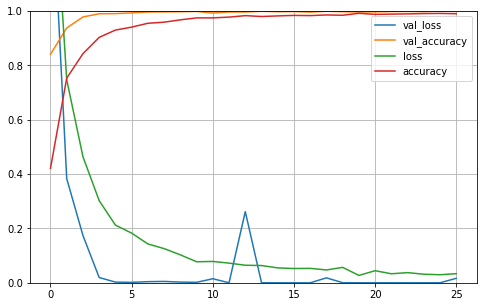

In [58]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.savefig("model_train_result1.png")
plt.show()

In [57]:
fig2.savefig('model_train_result_0.png')

Confusion Matrix


<AxesSubplot:>

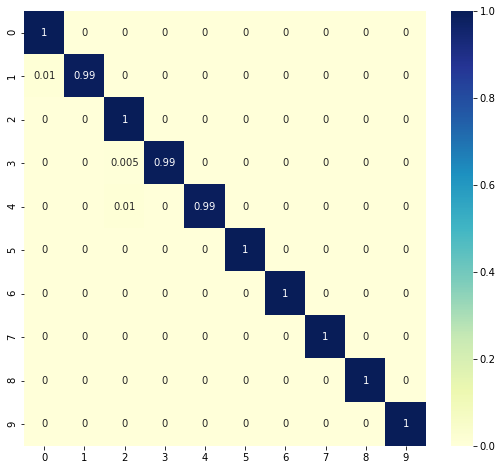

In [51]:
fig = plt.figure(figsize=(9,8))
Y_pred = model.predict_generator(test_generator)

y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')

cm = confusion_matrix(test_generator.classes, y_pred)

cm=cm/cm.sum(axis=1)
sn.heatmap(cm,annot=True,cmap="YlGnBu")

In [54]:
fig.savefig('confusion_matrix.png')

In [45]:
from keras.utils.vis_utils import plot_model

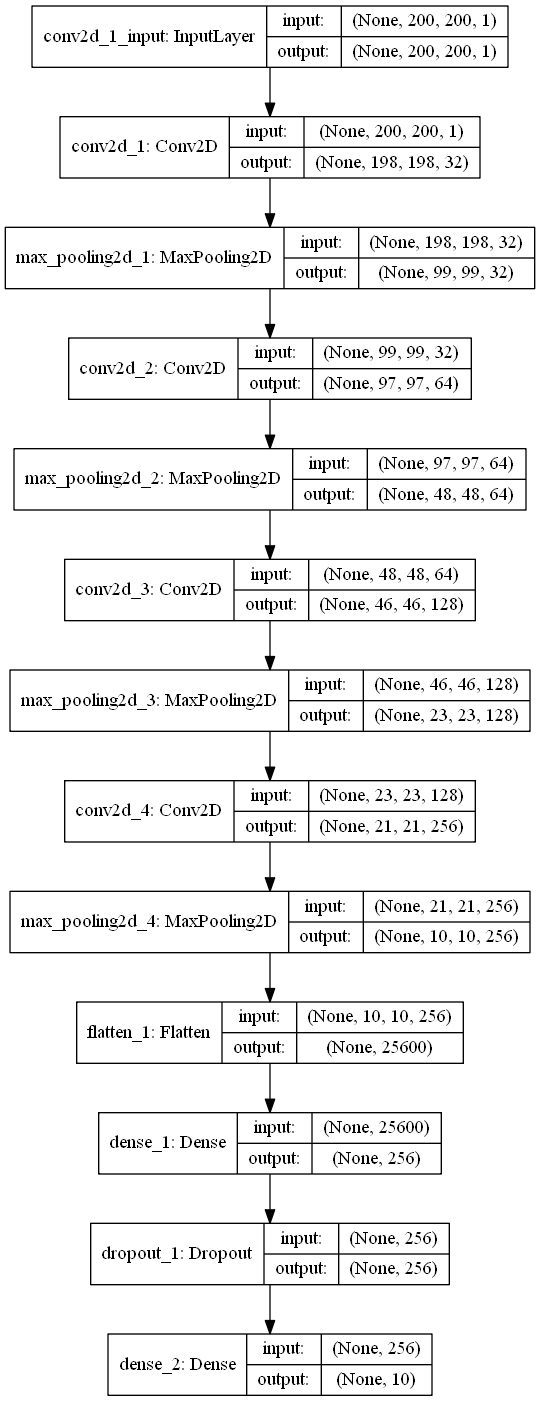

In [46]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [47]:
model_json = model.to_json()
with open("finalmodelv2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("finalmodelv2.h5")
print("Saved model to disk")

Saved model to disk
